# Data Preprocessing

## 1. Pendahuluan


---

### 1.1 Pengertian Data Preprocessing

**Data preprocessing** merupakan proses fundamental dalam data science yang bertujuan untuk mengubah data mentah (raw data) menjadi format yang bersih, terstruktur, dan siap untuk analisis lebih lanjut. 

Dalam konteks machine learning, data preprocessing adalah tahap kritis yang menentukan keberhasilan model. Data yang tidak diproses dengan baik dapat menyebabkan model belajar pola yang salah, menghasilkan prediksi yang tidak akurat, dan pada akhirnya gagal memberikan insight yang bermakna.


### 1.2 Pentingnya Data Preprocessing

- **Meningkatkan Kualitas Model**: Data yang bersih dan terstruktur memungkinkan model machine learning belajar pola yang lebih akurat
- **Menghindari Bias dan Error**: Preprocessing membantu mengidentifikasi dan menangani anomaly, outlier, dan bias dalam data
- **Optimasi Performa**: Data yang telah direduksi dan dinormalisasi dapat mempercepat proses training
- **Memastikan Konsistensi**: Standardisasi format data memastikan konsistensi across different data sources

---

## 2. Tahapan Data Preprocessing


### 2.1 Data Cleaning (Pembersihan Data)

#### Menangani Missing Values
- **Penghapusan Data**: Cocok untuk dataset besar dimana missing values hanya sebagian kecil
- **Imputasi Statistik**: Mengisi nilai yang hilang dengan mean/median (numerik) atau mode (kategorikal)
- **Advanced Imputation**: Menggunakan machine learning algorithms untuk memprediksi missing values

#### Menangani Outliers
**Deteksi Outliers**:
- Metode Statistik: Z-score, IQR (Interquartile Range)
- Visualisasi: Box plots, scatter plots
- Machine Learning: Isolation Forest, DBSCAN clustering, ABOD, LOF

**Penanganan Outliers**:
- Removal: Untuk outliers yang jelas merupakan kesalahan
- Capping: Membatasi nilai outliers pada batas tertentu
- Transformation: Menggunakan log transformation

### 2.2 Data Transformation

#### Normalization dan Standardization
- **Min-Max Scaling**: Mengubah skala data ke range [0, 1] atau [-1, 1]
- **Z-score Standardization**: Transformasi data sehingga memiliki mean = 0 dan standard deviation = 1

#### Encoding Categorical Data
- **One-Hot Encoding**: Mengubah categorical variables menjadi binary vectors
- **Label Encoding**: Mengassign numerical values kepada categories
- **Target Encoding**: Menggunakan mean of target variable untuk setiap category

#### Feature Engineering
- **Polynomial Features**: Membuat interaction terms dan polynomial terms
- **Binning**: Mengubah continuous variables menjadi categorical bins
- **Domain-Specific Features**: Membuat features berdasarkan domain knowledge

### 2.3 Data Reduction

#### Dimensionality Reduction
- **Principal Component Analysis (PCA)**: Linear transformation yang mengurangi dimensionality
- **t-SNE dan UMAP**: Nonlinear techniques untuk visualisasi
- **Feature Selection**: Filter Methods, Wrapper Methods, Embedded Methods

#### Dataset Reduction
- **Sampling Techniques**: Random sampling, Stratified sampling
- **Aggregation**: Mengaggregate data ke level yang lebih tinggi

---


## 3. Best Practices dan Tips Praktis

### Workflow Management
- **Reproducibility**: Selalu dokumentasikan semua preprocessing steps
- **Pipeline Development**: Bangun automated pipelines untuk konsistensi
- **Version Control**: Gunakan version control untuk preprocessing scripts

### Common Pitfalls
- **Data Leakage**: Hindari menggunakan information dari test set dalam preprocessing
- **Over-engineering**: Jangan membuat features yang terlalu complex
- **Ignoring Domain Context**: Selalu pertimbangkan domain knowledge

### Validation Strategies
- **Cross-validation**: Implementasikan preprocessing dalam setiap cross-validation fold
- **Monitoring**: Terus monitor impact of preprocessing pada model performance

---

## 4. Kesimpulan

**Data preprocessing** bukanlah tugas tunggal, melainkan serangkaian langkah penting yang saling terkait untuk memastikan data siap digunakan. Dari pembersihan data mentah hingga transformasi dan reduksi, setiap tahap memainkan peran vital dalam membangun fondasi yang kuat untuk analisis data dan machine learning. Mengabaikan proses ini sering kali menjadi penyebab utama kegagalan proyek data science. Oleh karena itu, pemahaman yang mendalam tentang setiap tahapan dan teknik di dalamnya adalah kunci untuk menghasilkan model yang akurat, efisien, dan andal.

## Studi Kasus

Setelah memahami tahapan umum data preprocessing, pada kali ini akan fokus pada salah satu tugas spesifik dalam Data Cleaning, yaitu deteksi pencilan (outlier). Kita akan membahas metode Angle-Based Outlier Detection (ABOD) dan cara implementasinya secara efisien menggunakan library PyCaret.

### Pengenalan Metode ABOD (Angle-Based Outlier Detection)
ABOD adalah salah satu algoritma deteksi outlier yang populer, terutama untuk data berdimensi tinggi (high-dimensional data). Berbeda dengan metode yang hanya mengandalkan jarak (seperti K-Nearest Neighbors), ABOD bekerja berdasarkan prinsip yang unik:

- **Intuisi Utama**: Sebuah titik data yang merupakan inlier (bukan outlier) akan berada di dalam sebuah cluster. Jika kita melihat dari titik tersebut, titik-titik tetangganya akan tersebar di berbagai sudut di sekelilingnya. Sebaliknya, sebuah outlier akan berada jauh dari kerumunan data utama. Jika kita melihat dari titik outlier ini, sebagian besar titik data lainnya akan berada dalam arah yang sempit, sehingga menghasilkan variasi sudut yang kecil.

Secara sederhana, ABOD mengukur varians sudut antara sebuah titik dengan pasangan titik-titik lainnya. Semakin kecil varians sudutnya, semakin besar kemungkinan titik tersebut adalah outlier.

**Keunggulan ABOD:**

- **Efektif di Dimensi Tinggi:** Kurang terpengaruh oleh "kutukan dimensi" (curse of dimensionality) yang sering menjadi masalah bagi metode berbasis jarak murni.

- **Tidak Membutuhkan Asumsi Distribusi:** Tidak mengasumsikan data mengikuti distribusi statistik tertentu (misalnya, distribusi normal).

---

### Implementasi Deteksi Outlier dengan PyCaret dan Penggunaan Power BI
Pada kali ini kita akan implementasi proses deteksi outlier dengan Power BI dan menggunakan library PyCaret pada python.

PyCaret adalah sebuah library low-code machine learning di Python yang memungkinkan kita untuk melakukan berbagai tugas data science, termasuk deteksi anomali (outlier), dengan sangat cepat dan efisien. PyCaret mengotomatiskan banyak langkah sehingga kita bisa fokus pada analisis.

Berikut adalah langkah-langkah umum untuk mendeteksi outlier menggunakan ABOD di PyCaret:

In [18]:
%pip install -q pyod==1.0.9 matplotlib seaborn scikit-learn==1.4.2 pandas numpy sqlalchemy psycopg2-binary

Note: you may need to restart the kernel to use updated packages.


In [19]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pyod.models.abod import ABOD
from sqlalchemy import create_engine
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import warnings
warnings.filterwarnings('ignore')

In [20]:

host ="localhost"
password = "root"
port = "5432"
usn = "postgres"

# # --- Koneksi ke DB1 (sepal) ---
# conn1 = create_engine(f"postgresql+psycopg2://{usn}:{password}@{host}:{port}/iris-1")

# # --- Koneksi ke DB2 (petal) ---
# conn2 = create_engine(f"postgresql+psycopg2://{usn}:{password}@{host}:{port}/iris-2")

# # --- Ambil data dari masing-masing database ---
# iris_sepal = pd.read_sql(
#     "SELECT * FROM iris_sepal",
#     conn1
# )

# iris_petal = pd.read_sql(
#     "SELECT * FROM iris_petal",
#     conn2
# )

# # --- Gabungkan ---
# iris_full = pd.concat([iris_sepal, iris_petal], axis=1)

# --- Simpan ke CSV ---
# iris_full.to_csv("csv/iris_full.csv", index=False)

iris_full = pd.read_csv('csv/iris_full.csv')

# --- Cek hasil ---
print("Dataset Info:")
print(f"Shape: {iris_full.shape}")
print(f"Columns: {iris_full.columns.tolist()}")
print("\nFirst 5 rows:")
print(iris_full.head())
print("\nDataset Description:")
print(iris_full.describe())

Dataset Info:
Shape: (150, 4)
Columns: ['sepal_length', 'sepal_width', 'petal_length', 'petal_width']

First 5 rows:
   sepal_length  sepal_width  petal_length  petal_width
0           5.1          3.5           1.4          0.2
1           4.9          3.0           1.4          0.2
2           4.7          3.2           1.3          0.2
3           4.6          3.1           1.5          0.2
4           5.0          3.6           1.4          0.2

Dataset Description:
       sepal_length  sepal_width  petal_length  petal_width
count    150.000000   150.000000    150.000000   150.000000
mean       5.843333     3.054000      3.758667     1.198667
std        0.828066     0.433594      1.764420     0.763161
min        4.300000     2.000000      1.000000     0.100000
25%        5.100000     2.800000      1.600000     0.300000
50%        5.800000     3.000000      4.350000     1.300000
75%        6.400000     3.300000      5.100000     1.800000
max        7.900000     4.400000      6.90000

In [21]:
print("Missing values:")
print(iris_full.isnull().sum())

# Pilih hanya kolom numerik untuk deteksi outlier
numeric_columns = ['sepal_length','sepal_width', 'petal_length', 'petal_width']
X = iris_full[numeric_columns].copy()

# Standardisasi data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_scaled_df = pd.DataFrame(X_scaled, columns=numeric_columns)

print(f"\nData after scaling:")
print(X_scaled_df.describe())

Missing values:
sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
dtype: int64

Data after scaling:
       sepal_length   sepal_width  petal_length   petal_width
count  1.500000e+02  1.500000e+02  1.500000e+02  1.500000e+02
mean  -4.736952e-16 -6.631732e-16  3.315866e-16 -2.842171e-16
std    1.003350e+00  1.003350e+00  1.003350e+00  1.003350e+00
min   -1.870024e+00 -2.438987e+00 -1.568735e+00 -1.444450e+00
25%   -9.006812e-01 -5.877635e-01 -1.227541e+00 -1.181504e+00
50%   -5.250608e-02 -1.249576e-01  3.362659e-01  1.332259e-01
75%    6.745011e-01  5.692513e-01  7.627586e-01  7.905908e-01
max    2.492019e+00  3.114684e+00  1.786341e+00  1.710902e+00


In [22]:
# Initialize ABOD detector
# contamination: persentase outlier yang diharapkan (default 0.1 = 10%)
abod = ABOD(contamination=0.1, method='fast')

# Fit model dan prediksi outlier
outlier_labels = abod.fit_predict(X_scaled)
outlier_scores = abod.decision_scores_

# Tambahkan hasil ke dataframe
iris_full['outlier_label'] = outlier_labels  # 0: normal, 1: outlier
iris_full['outlier_score'] = outlier_scores

# Tampilkan summary
n_outliers = sum(outlier_labels)
print(f"\nOutlier Detection Results:")
print(f"Total data points: {len(iris_full)}")
print(f"Number of outliers detected: {n_outliers}")
print(f"Percentage of outliers: {n_outliers/len(iris_full)*100:.2f}%")


Outlier Detection Results:
Total data points: 150
Number of outliers detected: 15
Percentage of outliers: 10.00%


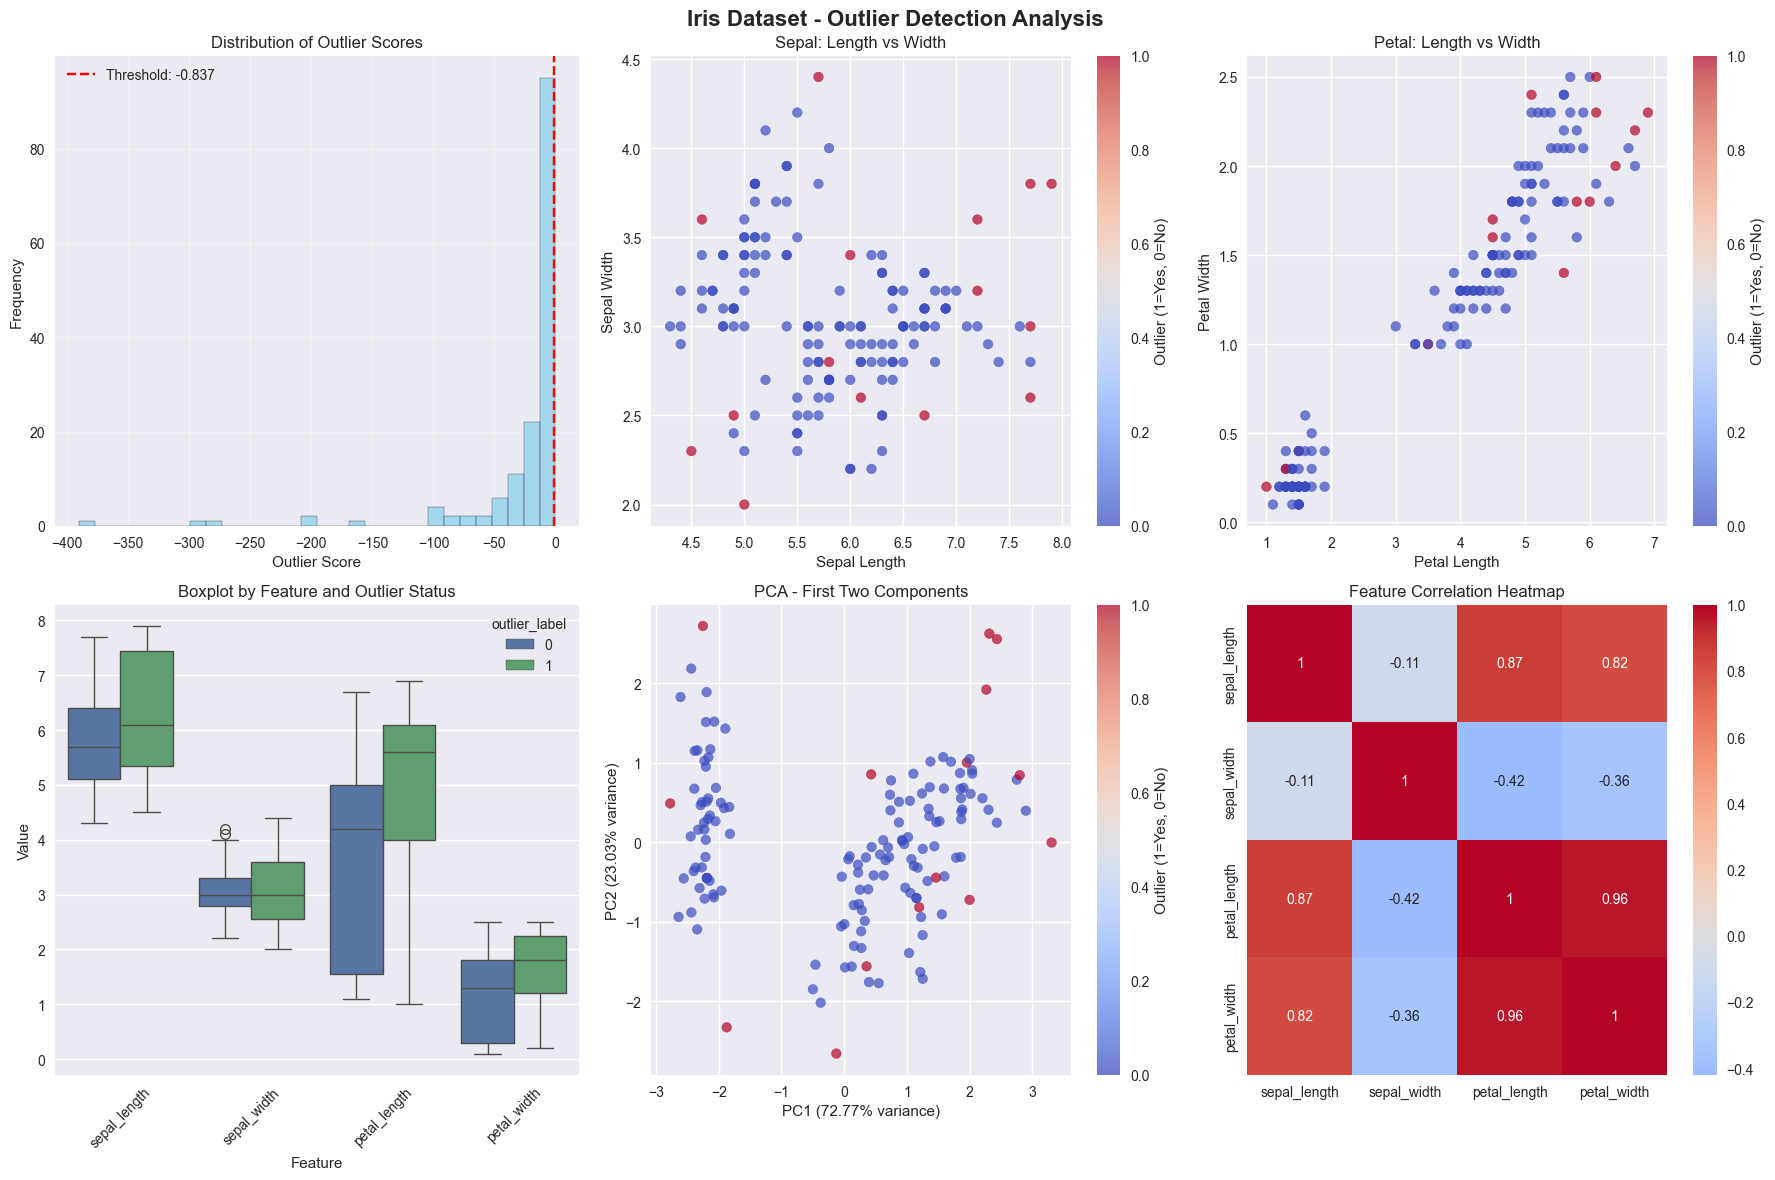


Detailed Analysis of Detected Outliers:

Top 10 outliers (highest scores):
     sepal_length  sepal_width  petal_length  petal_width  outlier_score
41            4.5          2.3           1.3          0.3      -0.035027
60            5.0          2.0           3.5          1.0      -0.061434
118           7.7          2.6           6.9          2.3      -0.091648
106           4.9          2.5           4.5          1.7      -0.101507
15            5.7          4.4           1.5          0.4      -0.125678
131           7.9          3.8           6.4          2.0      -0.159041
108           6.7          2.5           5.8          1.8      -0.198350
117           7.7          3.8           6.7          2.2      -0.329868
135           7.7          3.0           6.1          2.3      -0.365791
85            6.0          3.4           4.5          1.6      -0.386804

Comparison Statistics:
Feature         Normal Mean  Outlier Mean Difference
--------------------------------------------

In [23]:
plt.style.use('seaborn-v0_8')
fig, axes = plt.subplots(2, 3, figsize=(18, 12))
fig.suptitle('Iris Dataset - Outlier Detection Analysis',
             fontsize=16, fontweight='bold')

# 1. Outlier score distribution
axes[0, 0].hist(outlier_scores, bins=30, alpha=0.7,
                color='skyblue', edgecolor='black')
axes[0, 0].axvline(abod.threshold_, color='red', linestyle='--',
                   label=f'Threshold: {abod.threshold_:.3f}')
axes[0, 0].set_xlabel('Outlier Score')
axes[0, 0].set_ylabel('Frequency')
axes[0, 0].set_title('Distribution of Outlier Scores')
axes[0, 0].legend()
axes[0, 0].grid(True, alpha=0.3)

# 2. Scatter plot - Sepal Length vs Width
scatter1 = axes[0, 1].scatter(iris_full['sepal_length'], iris_full['sepal_width'],
                              c=outlier_labels, cmap='coolwarm', alpha=0.7)
axes[0, 1].set_xlabel('Sepal Length')
axes[0, 1].set_ylabel('Sepal Width')
axes[0, 1].set_title('Sepal: Length vs Width')
plt.colorbar(scatter1, ax=axes[0, 1], label='Outlier (1=Yes, 0=No)')

# 3. Scatter plot - Petal Length vs Width
scatter2 = axes[0, 2].scatter(iris_full['petal_length'], iris_full['petal_width'],
                              c=outlier_labels, cmap='coolwarm', alpha=0.7)
axes[0, 2].set_xlabel('Petal Length')
axes[0, 2].set_ylabel('Petal Width')
axes[0, 2].set_title('Petal: Length vs Width')
plt.colorbar(scatter2, ax=axes[0, 2], label='Outlier (1=Yes, 0=No)')

# 4. Boxplot untuk setiap feature
iris_melted = pd.melt(iris_full[numeric_columns + ['outlier_label']],
                      id_vars=['outlier_label'], var_name='Feature', value_name='Value')
sns.boxplot(data=iris_melted, x='Feature', y='Value',
            hue='outlier_label', ax=axes[1, 0])
axes[1, 0].set_title('Boxplot by Feature and Outlier Status')
axes[1, 0].tick_params(axis='x', rotation=45)

# 5. PCA visualization
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)
scatter3 = axes[1, 1].scatter(X_pca[:, 0], X_pca[:, 1], c=outlier_labels,
                                cmap='coolwarm', alpha=0.7)
axes[1, 1].set_xlabel(f'PC1 ({pca.explained_variance_ratio_[0]:.2%} variance)')
axes[1, 1].set_ylabel(f'PC2 ({pca.explained_variance_ratio_[1]:.2%} variance)')
axes[1, 1].set_title('PCA - First Two Components')
plt.colorbar(scatter3, ax=axes[1, 1], label='Outlier (1=Yes, 0=No)')

# 6. Correlation heatmap
corr_matrix = iris_full[numeric_columns].corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', center=0, ax=axes[1, 2])
axes[1, 2].set_title('Feature Correlation Heatmap')

plt.tight_layout()
plt.show()

# Cell 7: Analisis outlier yang terdeteksi
print("\nDetailed Analysis of Detected Outliers:")
print("="*50)

outliers_df = iris_full[iris_full['outlier_label']
                        == 1][numeric_columns + ['outlier_score']]
outliers_df = outliers_df.sort_values('outlier_score', ascending=False)

print(f"\nTop 10 outliers (highest scores):")
print(outliers_df.head(10))

# Statistik outlier vs normal
normal_data = iris_full[iris_full['outlier_label'] == 0][numeric_columns]
outlier_data = iris_full[iris_full['outlier_label'] == 1][numeric_columns]

print(f"\nComparison Statistics:")
print(f"{'Feature':<15} {'Normal Mean':<12} {'Outlier Mean':<12} {'Difference':<10}")
print("-" * 55)
for col in numeric_columns:
    normal_mean = normal_data[col].mean()
    outlier_mean = outlier_data[col].mean()
    diff = abs(outlier_mean - normal_mean)
    print(f"{col:<15} {normal_mean:<12.3f} {outlier_mean:<12.3f} {diff:<10.3f}")

In [24]:
# Opsi 1: Hapus outlier
iris_cleaned = iris_full[iris_full['outlier_label'] == 0].copy()

# Opsi 2: Simpan data dengan label outlier (untuk analisis lebih lanjut)
iris_with_outliers = iris_full.copy()

print(f"\nData Cleaning Results:")
print(f"Original dataset size: {len(iris_full)}")
print(f"Cleaned dataset size: {len(iris_cleaned)}")
print(f"Removed {len(iris_full) - len(iris_cleaned)} outliers")

# Simpan hasil
iris_cleaned[numeric_columns].to_csv("csv/iris_cleaned.csv", index=False)
iris_with_outliers.to_csv("csv/iris_with_outlier_labels.csv", index=False)

print(f"\nFiles saved:")
print(f"- iris_cleaned.csv (data tanpa outlier)")
print(f"- iris_with_outlier_labels.csv (data dengan label outlier)")

print(f"\nCleaned data preview:")
print(iris_cleaned[numeric_columns].head())
print(f"\nCleaned data statistics:")
print(iris_cleaned[numeric_columns].describe())


Data Cleaning Results:
Original dataset size: 150
Cleaned dataset size: 135
Removed 15 outliers

Files saved:
- iris_cleaned.csv (data tanpa outlier)
- iris_with_outlier_labels.csv (data dengan label outlier)

Cleaned data preview:
   sepal_length  sepal_width  petal_length  petal_width
0           5.1          3.5           1.4          0.2
1           4.9          3.0           1.4          0.2
2           4.7          3.2           1.3          0.2
3           4.6          3.1           1.5          0.2
4           5.0          3.6           1.4          0.2

Cleaned data statistics:
       sepal_length  sepal_width  petal_length  petal_width
count    135.000000   135.000000    135.000000   135.000000
mean       5.791111     3.051852      3.650370     1.154815
std        0.761721     0.401276      1.709319     0.751389
min        4.300000     2.200000      1.100000     0.100000
25%        5.100000     2.800000      1.550000     0.300000
50%        5.700000     3.000000      4.20000